In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf

# Import the data
df = pd.read_csv('/Users/elvisechefu/Desktop/language detection/languages.csv')
df.head(20)


,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german
5,gehen sie mir aus dem weg,german
6,zieht eure schlafanzüge an,german
7,als kind war ich süchtig nach kriminalromanen,german
8,ich habe das auto mit zehn prozent rabatt gekauft,german
9,niemand anders könnte meine arbeit machen,german


In [2]:
labels = df['language'].values

In [3]:
# Get all unique languages values
print(df.groupby('language').nunique())
print(f"Total Length of dataset: {len(df)}")

            text
language        
english   275687
french    169693
german    199618
spanish   118686
Total Length of dataset: 763684


In [4]:
# Check for missing values
print(df.isnull().sum())

text        0
language    0
dtype: int64


In [5]:
# Explore the columns and their types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763684 entries, 0 to 763683
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      763684 non-null  object
 1   language  763684 non-null  object
dtypes: object(2)
memory usage: 11.7+ MB
None


In [6]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip (columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df , dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

df = onehot_encode(
    df,
    columns=['language'],
    prefixes=['lan']
)
df.head()

,text,lan_english,lan_french,lan_german,lan_spanish
0,ich denke es handelt sich hier um ein missvers...,False,False,True,False
1,ich habe tom gerade erst verlassen,False,False,True,False
2,tom versuchte mary nur zu ärgern,False,False,True,False
3,tom hat mir die hand geküsst,False,False,True,False
4,ich wusste dass dir das gefiele,False,False,True,False


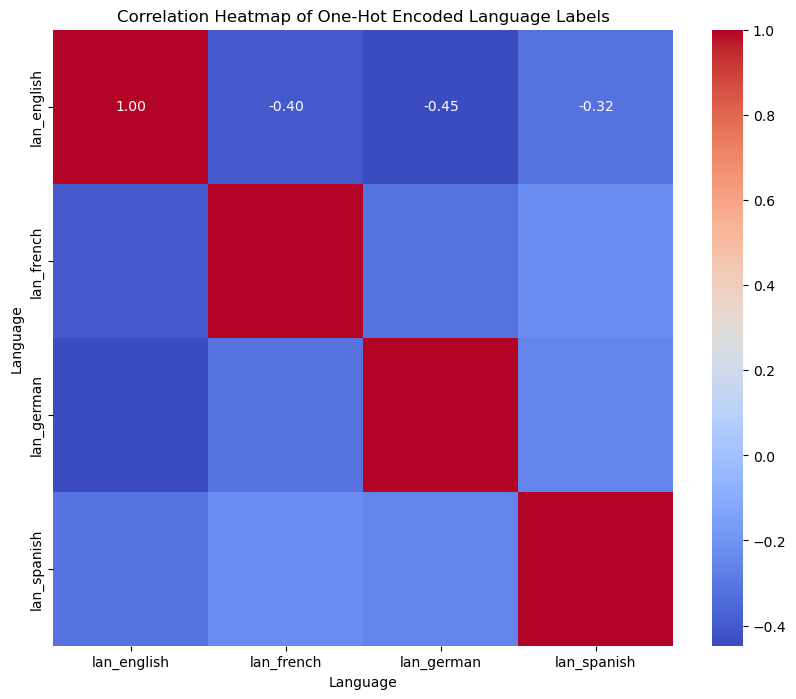

In [7]:
#Represnting the data in a heta-map as a form of visualisation

import seaborn as sns
import matplotlib.pyplot as plt

language_columns = [col for col in df.columns if col.startswith('lan_')]

# Calculate the correlation matrix
correlation_matrix = df[language_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of One-Hot Encoded Language Labels')
plt.xlabel('Language')
plt.ylabel('Language')
plt.show()

In [8]:

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elvisechefu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elvisechefu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Lowercasing
df['clean_text'] = df['text'].apply(lambda x: x.lower())

In [10]:

# Tokenization
df['tokenized_text'] = df['clean_text'].apply(nltk.word_tokenize)

In [11]:

# Removing Punctuation and Special Characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['clean_text'] = df['clean_text'].apply(remove_special_characters)

In [12]:
# Removing Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['preprocessed_text'] = df['tokenized_text'].apply(remove_stopwords)

In [13]:
df.head(10)

,text,lan_english,lan_french,lan_german,lan_spanish,clean_text,tokenized_text,preprocessed_text
0,ich denke es handelt sich hier um ein missvers...,False,False,True,False,ich denke es handelt sich hier um ein missvers...,"[ich, denke, es, handelt, sich, hier, um, ein,...","[ich, denke, es, handelt, sich, hier, um, ein,..."
1,ich habe tom gerade erst verlassen,False,False,True,False,ich habe tom gerade erst verlassen,"[ich, habe, tom, gerade, erst, verlassen]","[ich, habe, tom, gerade, erst, verlassen]"
2,tom versuchte mary nur zu ärgern,False,False,True,False,tom versuchte mary nur zu rgern,"[tom, versuchte, mary, nur, zu, ärgern]","[tom, versuchte, mary, nur, zu, ärgern]"
3,tom hat mir die hand geküsst,False,False,True,False,tom hat mir die hand geksst,"[tom, hat, mir, die, hand, geküsst]","[tom, hat, mir, die, hand, geküsst]"
4,ich wusste dass dir das gefiele,False,False,True,False,ich wusste dass dir das gefiele,"[ich, wusste, dass, dir, das, gefiele]","[ich, wusste, dass, dir, das, gefiele]"
5,gehen sie mir aus dem weg,False,False,True,False,gehen sie mir aus dem weg,"[gehen, sie, mir, aus, dem, weg]","[gehen, sie, mir, aus, dem, weg]"
6,zieht eure schlafanzüge an,False,False,True,False,zieht eure schlafanzge an,"[zieht, eure, schlafanzüge, an]","[zieht, eure, schlafanzüge]"
7,als kind war ich süchtig nach kriminalromanen,False,False,True,False,als kind war ich schtig nach kriminalromanen,"[als, kind, war, ich, süchtig, nach, kriminalr...","[als, kind, war, ich, süchtig, nach, kriminalr..."
8,ich habe das auto mit zehn prozent rabatt gekauft,False,False,True,False,ich habe das auto mit zehn prozent rabatt gekauft,"[ich, habe, das, auto, mit, zehn, prozent, rab...","[ich, habe, das, auto, mit, zehn, prozent, rab..."
9,niemand anders könnte meine arbeit machen,False,False,True,False,niemand anders knnte meine arbeit machen,"[niemand, anders, könnte, meine, arbeit, machen]","[niemand, anders, könnte, meine, arbeit, machen]"


In [14]:
import importlib

smart_open = importlib.import_module('smart_open')

# Use the `smart_open` module as usual

In [15]:
import tensorflow_hub as hub

In [16]:
import gensim
print(gensim.__version__)

4.3.0


In [17]:
import gensim.downloader as api
# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

In [18]:
# Function to calculate word embeddings for a single sentence
def get_sentence_embedding(sentence):
    word_embeddings = []
    for word in sentence:
        if word in word2vec_model:
            word_embeddings.append(word2vec_model[word])
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no embeddings found

In [19]:
# Calculate word embeddings for each sentence in the preprocessed_text column
sentence_embeddings = df['preprocessed_text'].apply(get_sentence_embedding)

In [ ]:
# Convert embeddings to a NumPy array
embedding_array = np.array(sentence_embeddings.tolist())

# Convert NumPy array to DataFrame
embedding_df = pd.DataFrame(embedding_array)

# Print DataFrame with embeddings as features
print(embedding_df)

             0         1         2         3         4         5         6    \
0       0.160191  0.075335  0.017479  0.019527 -0.073138  0.105469  0.082066   
1       0.101733  0.147803 -0.076653  0.075049 -0.051208  0.032227  0.011084   
2       0.153046  0.073502 -0.078613  0.105591 -0.049408 -0.009155  0.052979   
3       0.014868  0.048608 -0.090283  0.182666 -0.185156 -0.005957  0.157471   
4       0.250977  0.045776  0.073038 -0.035400  0.009239  0.160034  0.020020   
...          ...       ...       ...       ...       ...       ...       ...   
763679  0.054390  0.003998  0.053654  0.159729 -0.216125 -0.051636  0.086121   
763680  0.059814  0.183594 -0.025024 -0.087402  0.068848  0.208008  0.090820   
763681  0.154078  0.200195  0.018270  0.063843 -0.229980  0.001628  0.053528   
763682 -0.035889  0.099609  0.351562  0.474609 -0.008972 -0.069824  0.043213   
763683  0.023315  0.124512 -0.169952 -0.062103  0.024261 -0.054626  0.012634   

             7         8         9    .

In [ ]:
df.head(10)

,text,lan_english,lan_french,lan_german,lan_spanish,clean_text,tokenized_text,preprocessed_text
0,ich denke es handelt sich hier um ein missvers...,False,False,True,False,ich denke es handelt sich hier um ein missvers...,"[ich, denke, es, handelt, sich, hier, um, ein,...","[ich, denke, es, handelt, sich, hier, um, ein,..."
1,ich habe tom gerade erst verlassen,False,False,True,False,ich habe tom gerade erst verlassen,"[ich, habe, tom, gerade, erst, verlassen]","[ich, habe, tom, gerade, erst, verlassen]"
2,tom versuchte mary nur zu ärgern,False,False,True,False,tom versuchte mary nur zu rgern,"[tom, versuchte, mary, nur, zu, ärgern]","[tom, versuchte, mary, nur, zu, ärgern]"
3,tom hat mir die hand geküsst,False,False,True,False,tom hat mir die hand geksst,"[tom, hat, mir, die, hand, geküsst]","[tom, hat, mir, die, hand, geküsst]"
4,ich wusste dass dir das gefiele,False,False,True,False,ich wusste dass dir das gefiele,"[ich, wusste, dass, dir, das, gefiele]","[ich, wusste, dass, dir, das, gefiele]"
5,gehen sie mir aus dem weg,False,False,True,False,gehen sie mir aus dem weg,"[gehen, sie, mir, aus, dem, weg]","[gehen, sie, mir, aus, dem, weg]"
6,zieht eure schlafanzüge an,False,False,True,False,zieht eure schlafanzge an,"[zieht, eure, schlafanzüge, an]","[zieht, eure, schlafanzüge]"
7,als kind war ich süchtig nach kriminalromanen,False,False,True,False,als kind war ich schtig nach kriminalromanen,"[als, kind, war, ich, süchtig, nach, kriminalr...","[als, kind, war, ich, süchtig, nach, kriminalr..."
8,ich habe das auto mit zehn prozent rabatt gekauft,False,False,True,False,ich habe das auto mit zehn prozent rabatt gekauft,"[ich, habe, das, auto, mit, zehn, prozent, rab...","[ich, habe, das, auto, mit, zehn, prozent, rab..."
9,niemand anders könnte meine arbeit machen,False,False,True,False,niemand anders knnte meine arbeit machen,"[niemand, anders, könnte, meine, arbeit, machen]","[niemand, anders, könnte, meine, arbeit, machen]"


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target labels (y)
X = df['preprocessed_text']
y = df['tokenized_text']

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split the training data into training and validation sets (80% train, 20% validate)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the resulting sets
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (488757,) (488757,)
Validation set: (122190,) (122190,)
Test set: (152737,) (152737,)


In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(y_train)

MultiLabelBinarizer()

In [ ]:
y_train_binary = mlb.transform(y_train)
y_val_binary = mlb.transform(y_val)
y_test_binary = mlb.transform(y_test)

: 

: 